In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# import spikeinterface.full as si
import spikeinterface as si
from pathlib import Path

In [3]:
from configuration import base_path
global_name = 'clustering_whitening'

# dataset_name = 'Neuronexus-32_50_300.s'
dataset_name = 'Neuropixel-128_250_300.s'

study_folder = base_path / global_name / dataset_name / 'study'
si.set_global_job_kwargs(n_jobs=0.8)

In [5]:
from spikeinterface.sortingcomponents.benchmark.benchmark_clustering import ClusteringStudy
study = ClusteringStudy(study_folder)
study

ClusteringStudy study 
  datasets: 3 ['non-whiten', 'whiten_global', 'whiten_local']
  cases: 9 [('tdc_clustering', 'non-whiten'), ('tdc_clustering', 'whiten_global'), ('tdc_clustering', 'whiten_local'), ('circus', 'non-whiten'), ('circus', 'whiten_global'), ('circus', 'whiten_local'), ('random_projections', 'non-whiten'), ('random_projections', 'whiten_global'), ('random_projections', 'whiten_local')]
  computed: 9

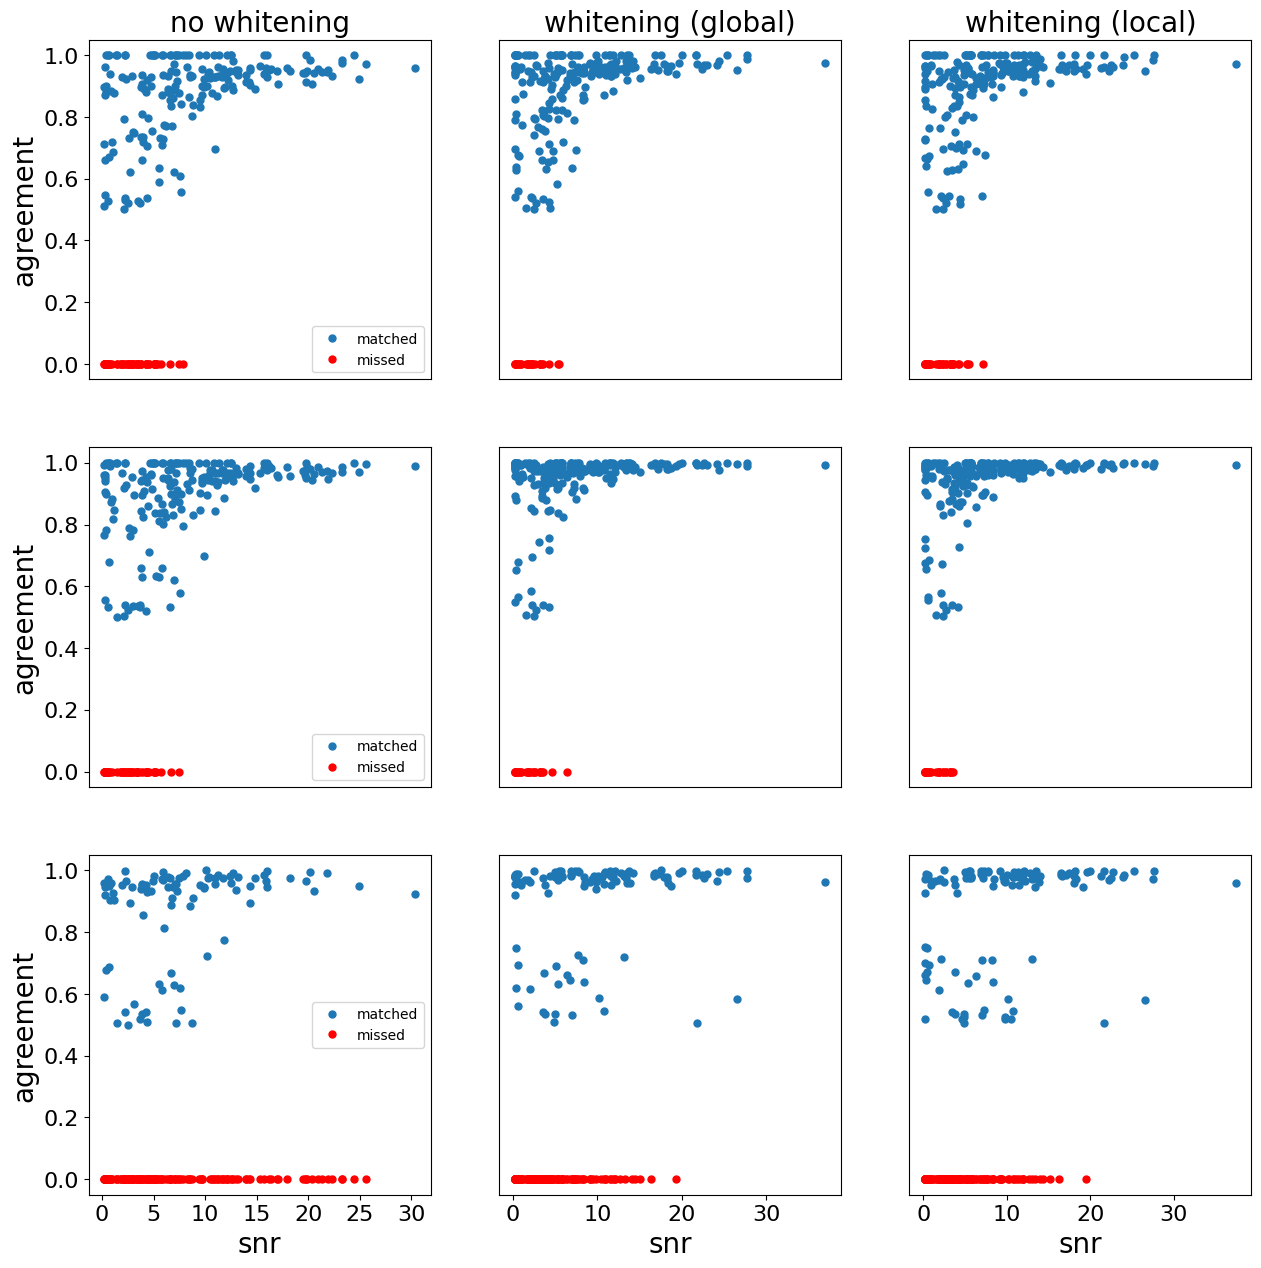

In [36]:
myparams = {'axes.titlesize' : 20,
            'axes.labelsize' : 20,
            'lines.linewidth' : 3,
            'lines.markersize' : 10,
            'xtick.labelsize' : 16,
            'ytick.labelsize' : 16}

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
with mpl.rc_context(myparams):
    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
    axes = axes.flatten()
    study.plot_metrics_vs_snr(metric='agreement', axes=axes)
    for count, ax in enumerate(axes):
        ax.set_title("")
        if np.mod(count, 3)!=0:
            ax.set_ylabel('')
            ax.set_yticks([], [])
            ax.get_legend().remove()
        if count < 6:
            ax.set_xlabel('')
            ax.set_xticks([], [])
        if count == 0:
            ax.set_title('no whitening')
        if count == 1:
            ax.set_title('whitening (global)')
        if count == 2:
            ax.set_title('whitening (local)')
                         

In [8]:
study.homogeneity_score()

tdc_clustering non-whiten Homogeneity: 0.9566074838848379 Noise (%): 0.15256168494860695
tdc_clustering whiten_global Homogeneity: 0.9776614690749363 Noise (%): 0.08438288491673528
tdc_clustering whiten_local Homogeneity: 0.9786592665655457 Noise (%): 0.09456056944038671
circus non-whiten Homogeneity: 0.9318044338459528 Noise (%): 0.05218188095933707
circus whiten_global Homogeneity: 0.9732287249674209 Noise (%): 0.030209024992696076
circus whiten_local Homogeneity: 0.9720714816916469 Noise (%): 0.03110939948474144
random_projections non-whiten Homogeneity: 0.9345255481171676 Noise (%): 0.4771984807840429
random_projections whiten_global Homogeneity: 0.8682026117154231 Noise (%): 0.010382194364027516
random_projections whiten_local Homogeneity: 0.8745229203673627 Noise (%): 0.009404796685347003


In [3]:
fig = study.plot_metrics_vs_snr(metric='cosine')
study.plot_metrics_vs_snr('agreement')

NameError: name 'study' is not defined

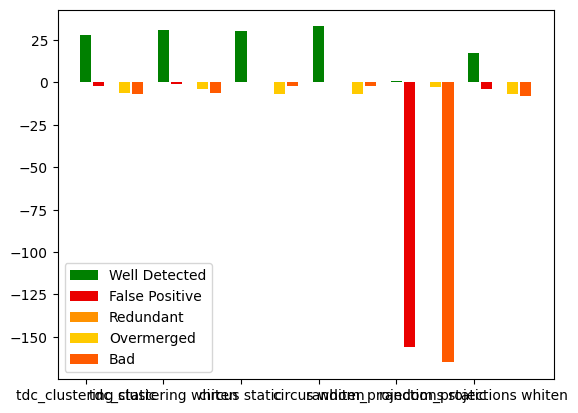

In [12]:
study.plot_unit_counts()

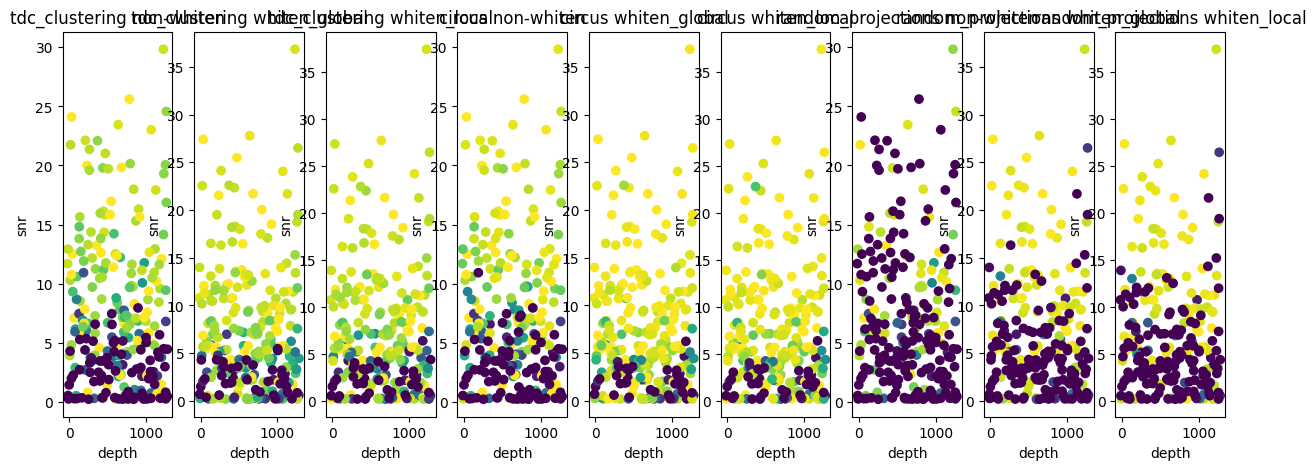

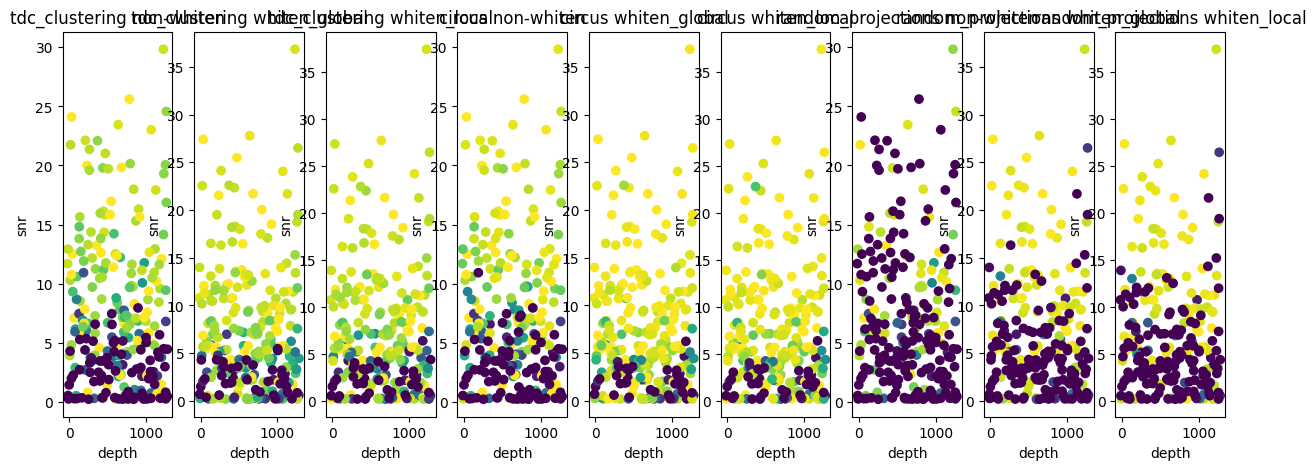

In [17]:
study.plot_metrics_vs_depth_and_snr()

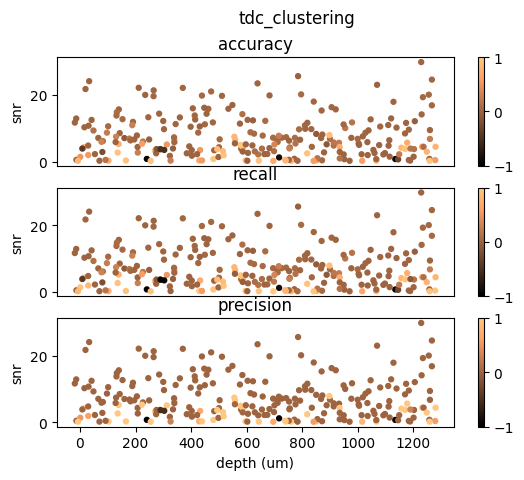

In [21]:
fig = study.plot_unit_losses(('tdc_clustering', 'non-whiten'), ('tdc_clustering', 'whiten_global'))
fig.suptitle("tdc_clustering")
fig.savefig("clustering_whitening1.png")




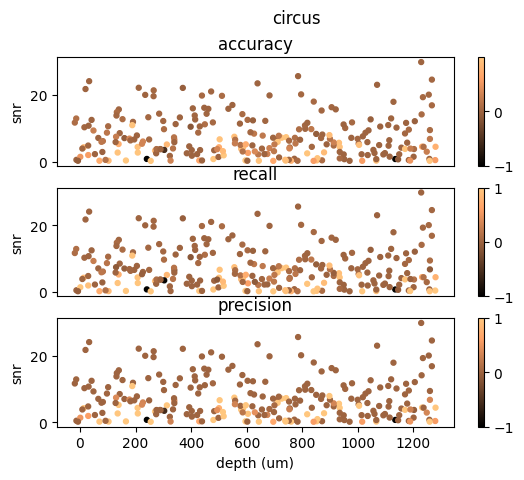

In [22]:
fig = study.plot_unit_losses(('circus', 'non-whiten'), ('circus', 'whiten_global'))
fig.suptitle("circus")
fig.savefig("clustering_whitening2.png")